In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/Temperature_predicton.csv")  # Importing the data

In [3]:
df.head() # Checking frist five elements

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail() # Checking last five elements

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.shape # We have 908 rows and 25 coulmns

(7752, 25)

In [6]:
df.info() # We have some depreciated values in our data set and will take care of them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.nunique() # Checking how many unique properties each column has

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [8]:
df.isnull().sum() # Checking null values

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df = df.dropna()

In [10]:
categorical_features = df.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['Date'], dtype='object')


In [11]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [12]:
df[['Day', 'Month','Year']] = df['Date'].str.split('-', expand=True)
df = df.drop(['Date'],axis=1)

In [13]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


In [14]:
df['Month'].unique()

array(['06', '07', '08'], dtype=object)

In [15]:
df['Month'].value_counts()

07    3820
08    3652
06     116
Name: Month, dtype: int64

In [16]:
import datetime
import calendar
df['Month'] = df['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])

In [17]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


### PErforming EDA

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

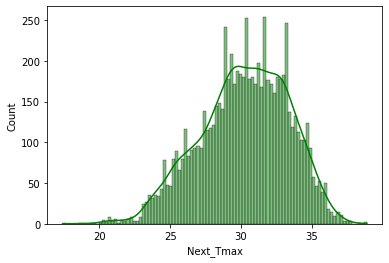

In [18]:
sns.histplot(df['Next_Tmax'],bins = 100 , kde = True, color = 'green') # Most of the flight prices range from 2000-20000

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

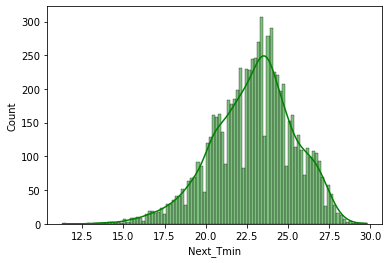

In [19]:
sns.histplot(df['Next_Tmin'],bins = 100 , kde = True, color = 'green') # Most of the flight prices range from 2000-20000

<Figure size 432x288 with 0 Axes>

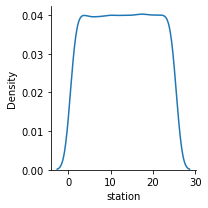

<Figure size 432x288 with 0 Axes>

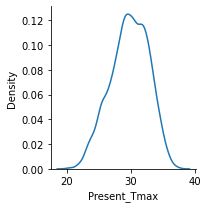

<Figure size 432x288 with 0 Axes>

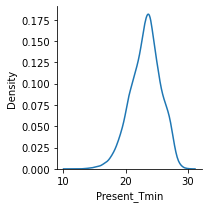

<Figure size 432x288 with 0 Axes>

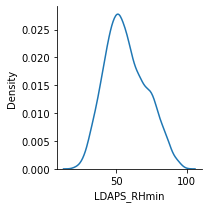

<Figure size 432x288 with 0 Axes>

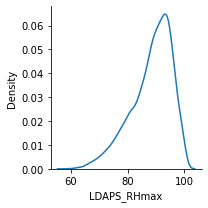

<Figure size 432x288 with 0 Axes>

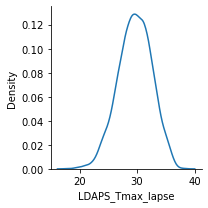

<Figure size 432x288 with 0 Axes>

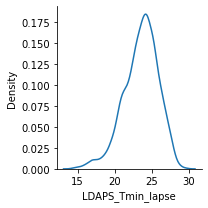

<Figure size 432x288 with 0 Axes>

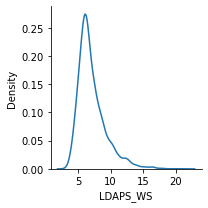

<Figure size 432x288 with 0 Axes>

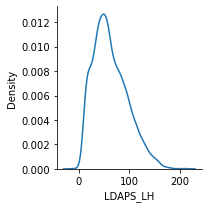

<Figure size 432x288 with 0 Axes>

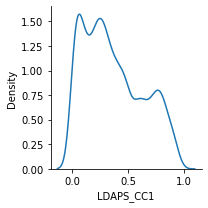

<Figure size 432x288 with 0 Axes>

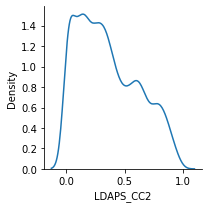

<Figure size 432x288 with 0 Axes>

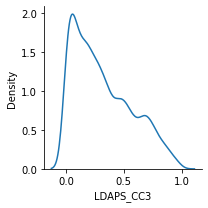

<Figure size 432x288 with 0 Axes>

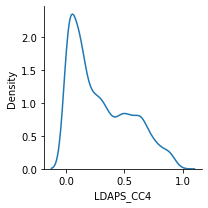

<Figure size 432x288 with 0 Axes>

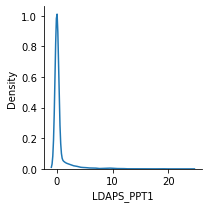

<Figure size 432x288 with 0 Axes>

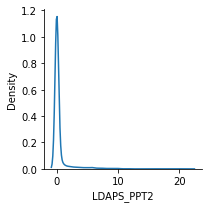

<Figure size 432x288 with 0 Axes>

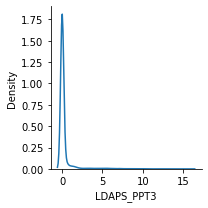

<Figure size 432x288 with 0 Axes>

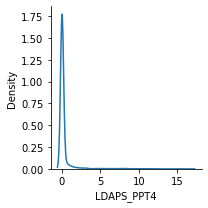

<Figure size 432x288 with 0 Axes>

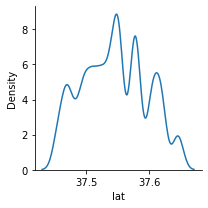

<Figure size 432x288 with 0 Axes>

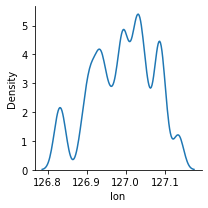

<Figure size 432x288 with 0 Axes>

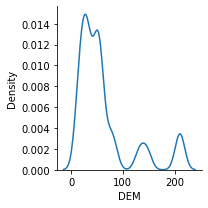

<Figure size 432x288 with 0 Axes>

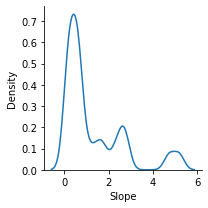

<Figure size 432x288 with 0 Axes>

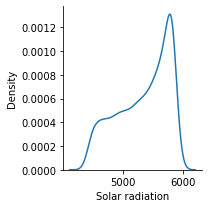

<Figure size 432x288 with 0 Axes>

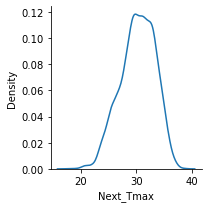

<Figure size 432x288 with 0 Axes>

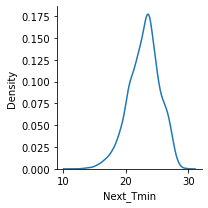

In [20]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

In [21]:
print(numerical_features.columns)

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


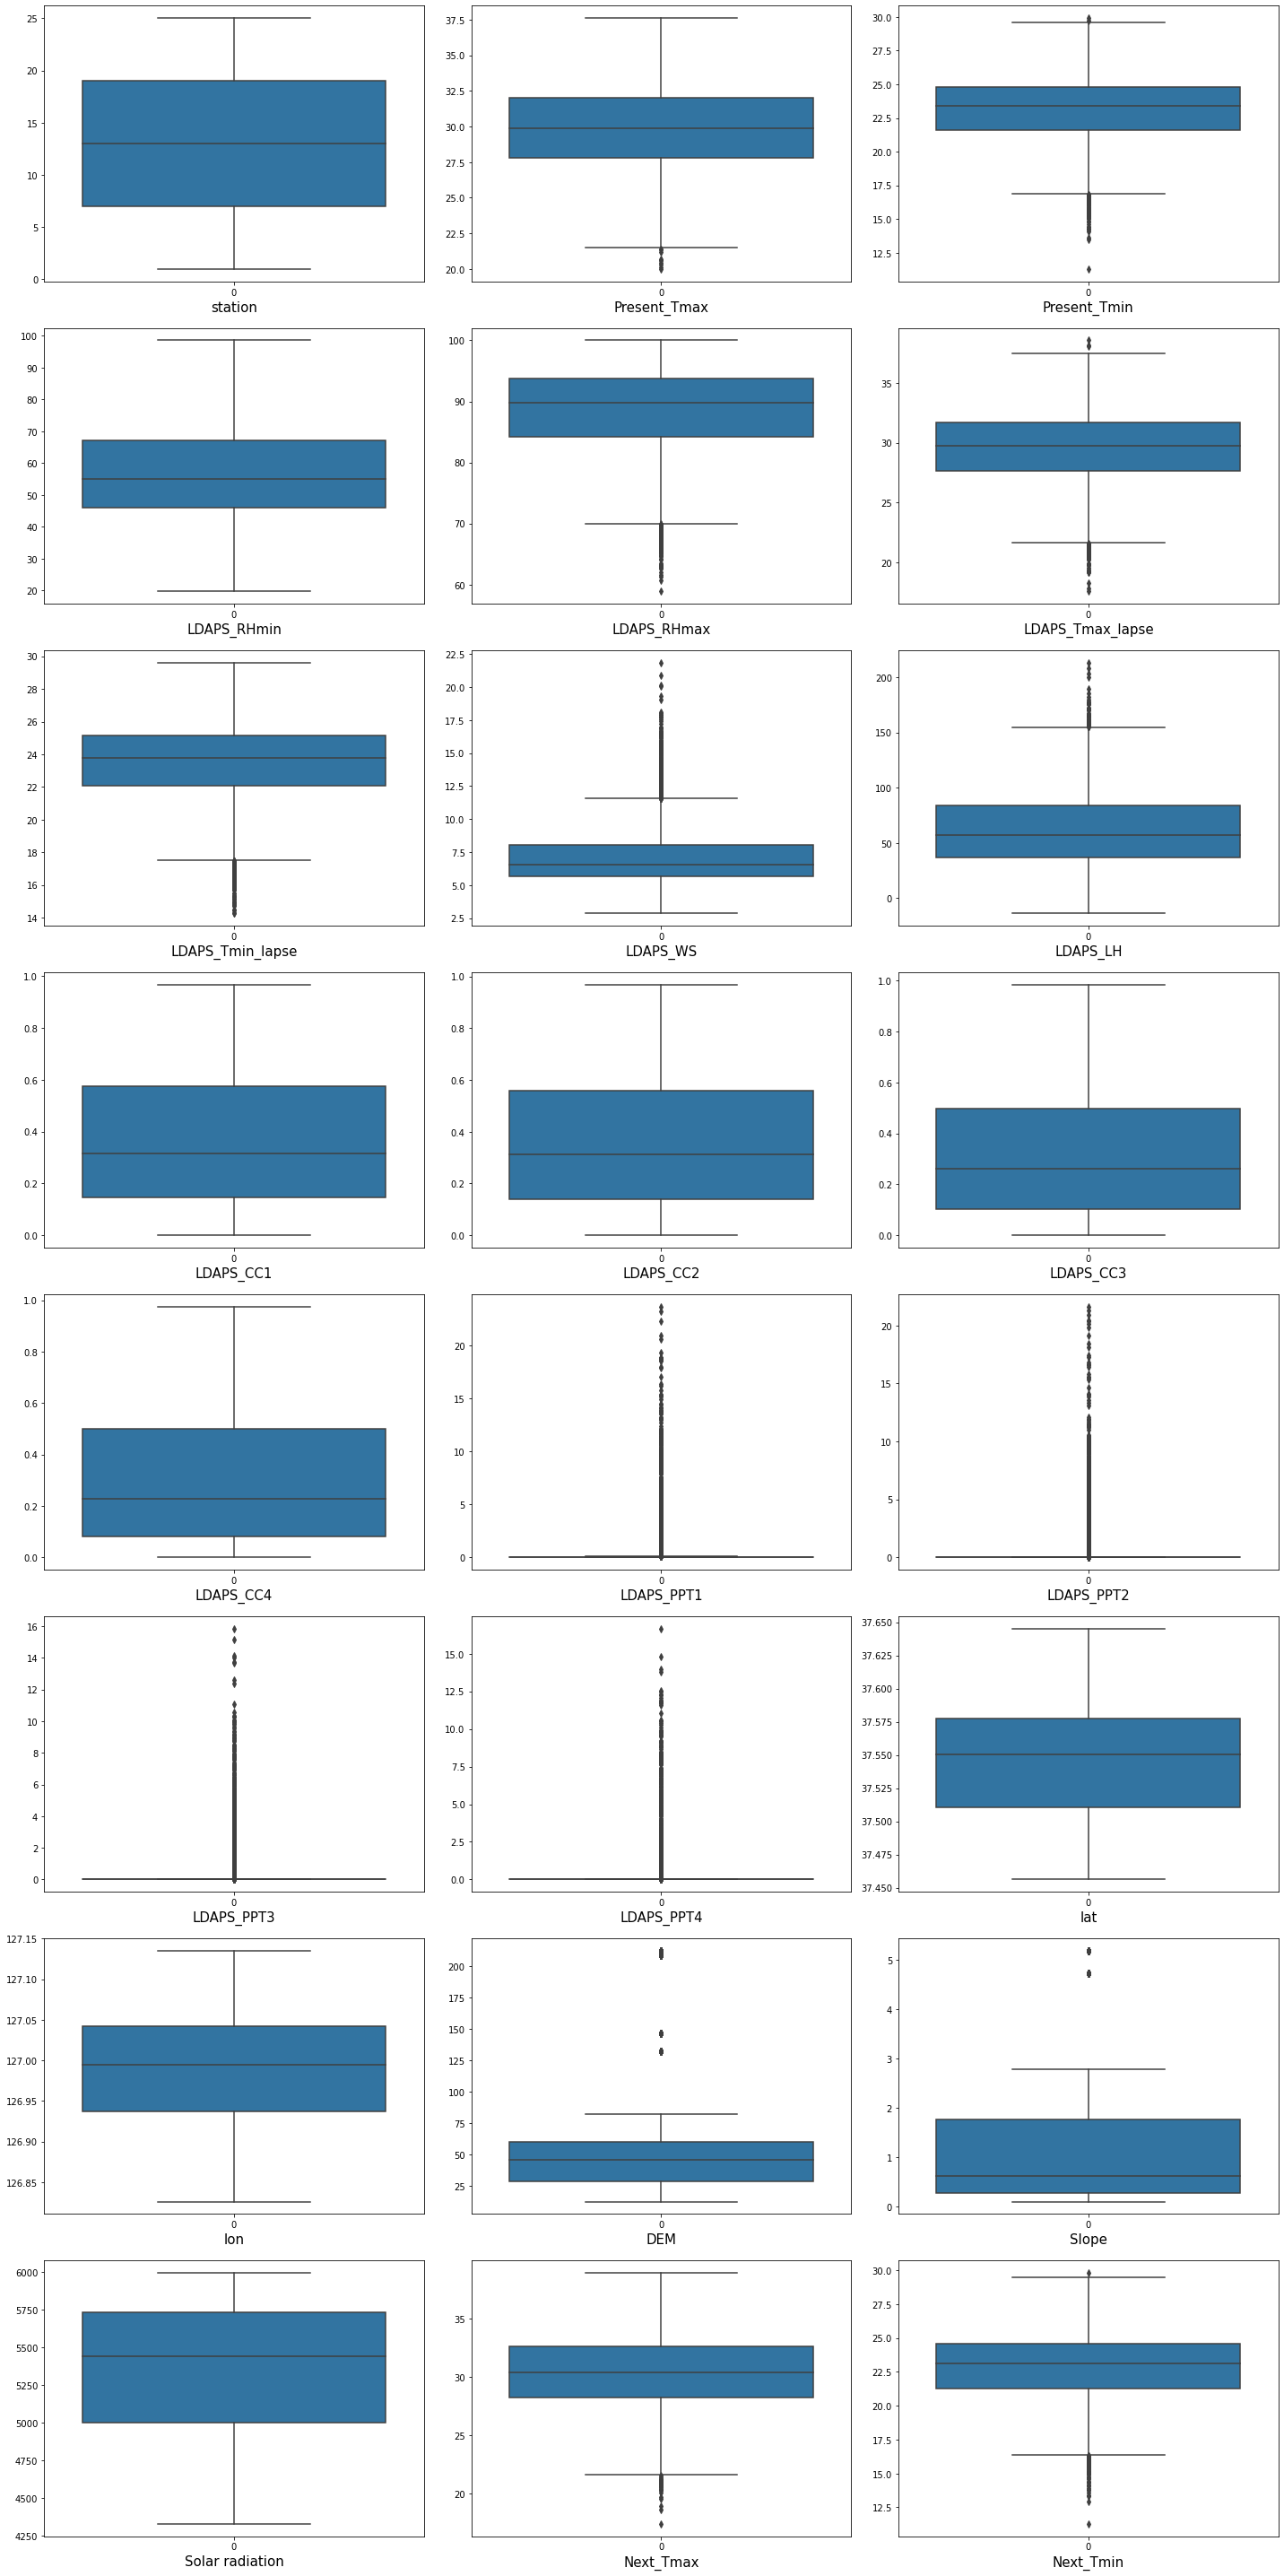

In [22]:
plt.figure(figsize = (20, 40))
num = 1

for col in df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']]:
    if num <= 24:
        ax = plt.subplot(8, 3, num)
        sns.boxplot(data = df[col])
        plt.xlabel(col, fontsize = 15)
    
    num += 1
plt.tight_layout()
plt.show()

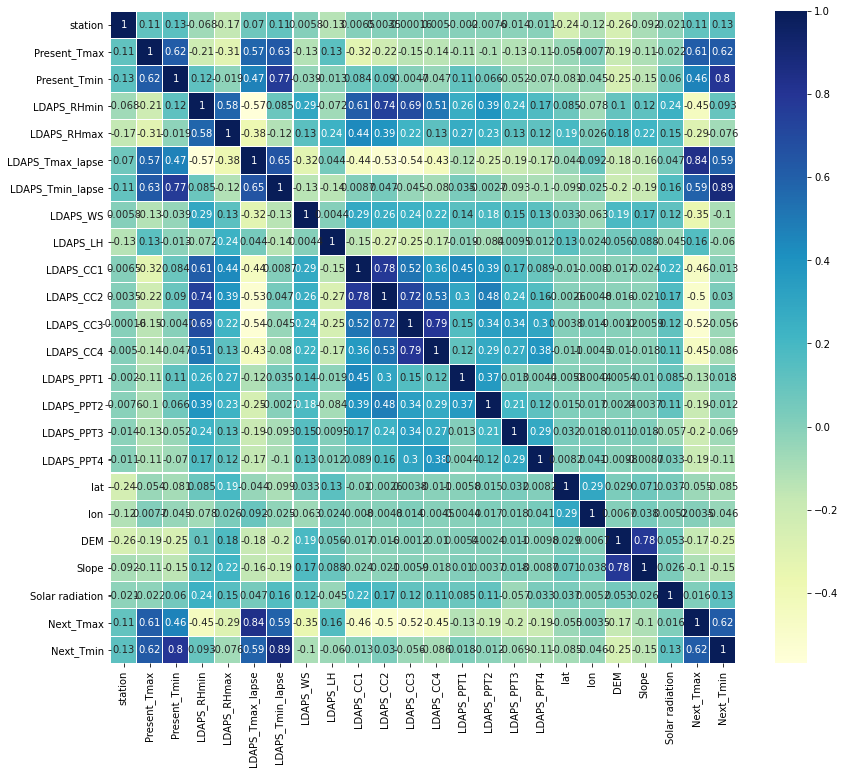

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation

<AxesSubplot:title={'center':'High Correlation'}>

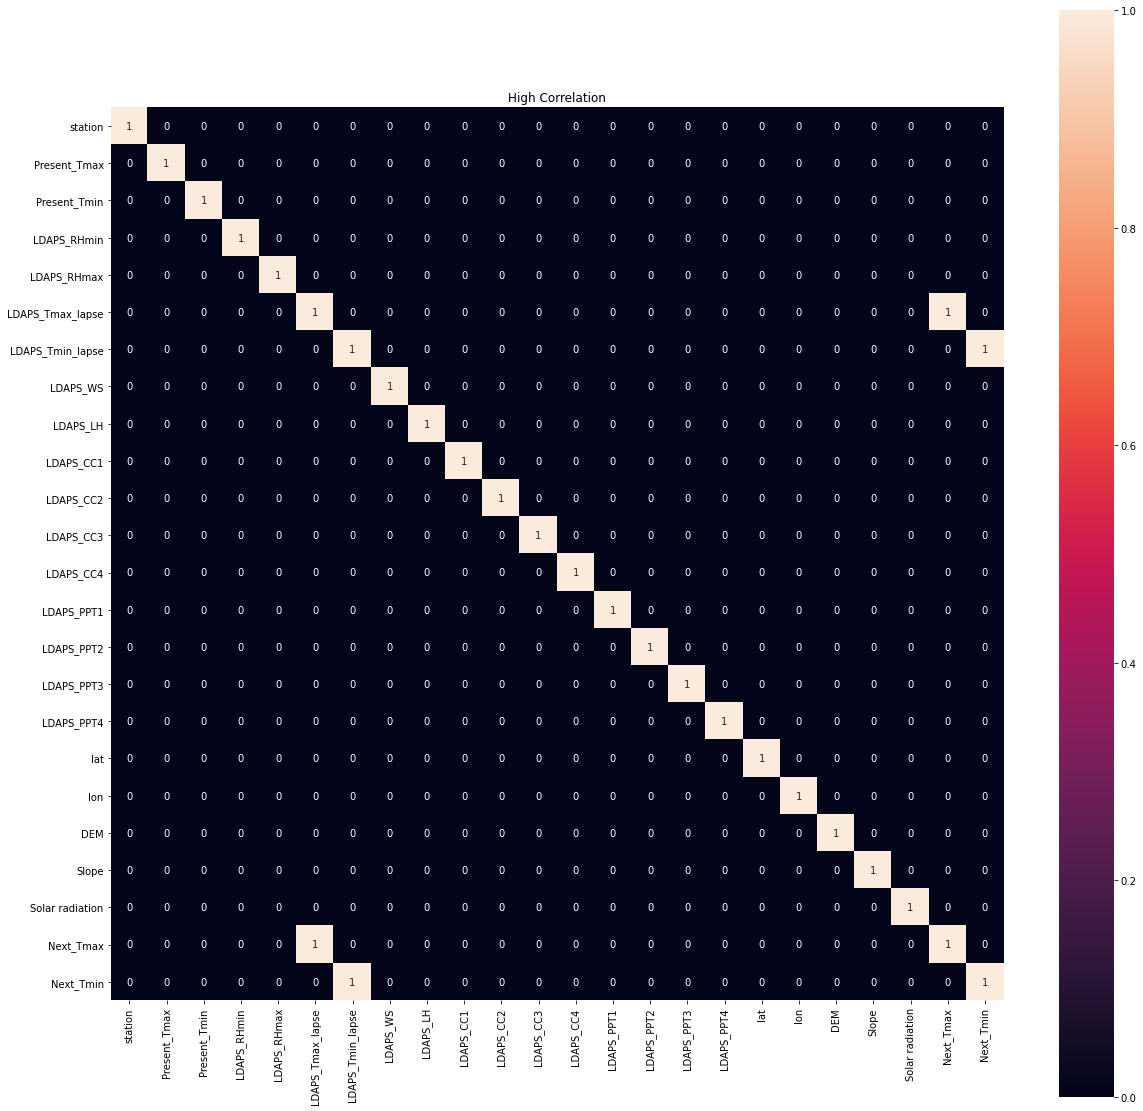

In [24]:
num_correlation = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

In [25]:
high_corr = ['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse']

df.drop(high_corr, inplace = True, axis = 1)

In [26]:
useless = ['lat','lon']

df.drop(useless, inplace = True, axis = 1)

In [27]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols = ['Month'], handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [28]:
data_encoded = encoder.fit_transform(df)
data_encoded

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month_Jun,Month_Jul,Month_Aug,Year
0,1.0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,212.3350,2.7850,5992.895996,29.1,21.2,30,1.0,0.0,0.0,2013
1,2.0,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,44.7624,0.5141,5869.312500,30.5,22.5,30,1.0,0.0,0.0,2013
2,3.0,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,33.3068,0.2661,5863.555664,31.1,23.9,30,1.0,0.0,0.0,2013
3,4.0,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,45.7160,2.5348,5856.964844,31.7,24.3,30,1.0,0.0,0.0,2013
4,5.0,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,35.0380,0.5055,5859.552246,31.2,22.5,30,1.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,6.603253,9.614074,0.052902,0.030169,0.000000e+00,...,26.2980,0.5721,4456.024414,27.6,17.7,30,0.0,0.0,1.0,2017
7746,22.0,22.5,17.4,30.094858,83.690018,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,21.9668,0.1332,4441.803711,28.0,17.1,30,0.0,0.0,1.0,2017
7747,23.0,23.3,17.1,26.741310,78.869858,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,15.5876,0.1554,4443.313965,28.3,18.1,30,0.0,0.0,1.0,2017
7748,24.0,23.3,17.7,24.040634,77.294975,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,17.2956,0.2223,4438.373535,28.6,18.8,30,0.0,0.0,1.0,2017


In [29]:
final_df = data_encoded.copy()

In [30]:
X = final_df.drop(['Next_Tmax'],axis=1)
y = final_df[['Next_Tmax']]

In [31]:
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import sklearn.metrics as sm

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (6070, 24)
Y Train Shape  (6070, 1)
X Test Shape  (1518, 24)
Y Test Shape  (1518, 1)


Standardising the data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Standardising the data

In [34]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

### Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.82249026449924

In [36]:
scr = cross_val_score(dtr, X,y, cv=5)
print(scr.mean())

0.2882095825895698


In [37]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 0.91
Mean squared error = 1.72
Median absolute error = 0.6
Explain variance score = 0.82
R2 score = 0.82


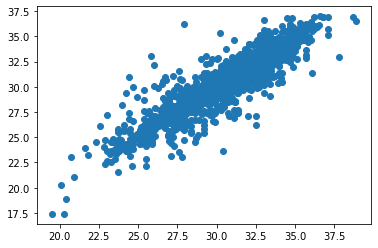

In [38]:
plt.scatter(y_test,y_pred_dt)

### Random Forest Regressor

In [39]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9216958337766056

In [40]:
scr = cross_val_score(rfr, X,y, cv=5)
print(scr.mean())

0.6020204645787579


In [41]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 0.64
Mean squared error = 0.76
Median absolute error = 0.49
Explain variance score = 0.92
R2 score = 0.92


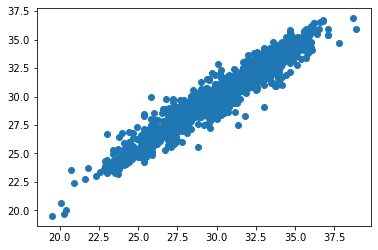

In [42]:
plt.scatter(y_test,y_pred_rfr)

### Lasso Regression

In [43]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
y_pred_lasso = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)

0.7453936263532934

In [44]:
scr = cross_val_score(lassoReg, X,y, cv=5)
print(scr.mean())

0.6458458537760879


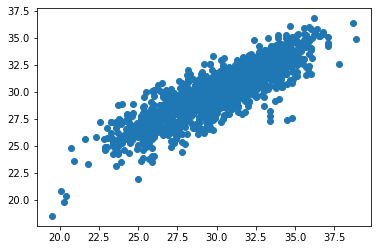

In [45]:
plt.scatter(y_test,y_pred_lasso)

### Support vector regression

In [46]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.8710865104544665

In [47]:
scr = cross_val_score(svr, X,y, cv=5)
print(scr.mean())

-0.06260267301645384


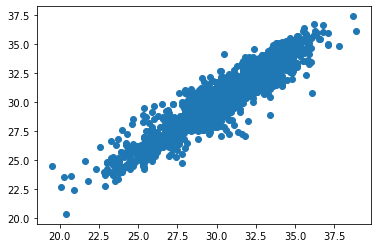

In [48]:
plt.scatter(y_test,y_pred_svr)

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.7613559982220118

In [50]:
cr = cross_val_score(lr, X_train,y_train, cv=5)
print(scr.mean())

-0.06260267301645384


### Hyper paramter tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [53]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [54]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})


In [55]:
GCV.best_params_ # These are the best parameters

{'criterion': 'mae',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}


In [56]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mae')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9205005953018237

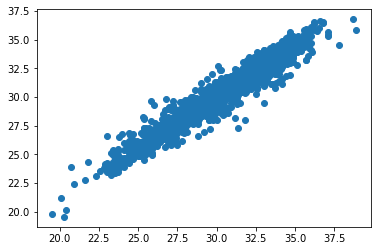

In [57]:
plt.scatter(y_test,pred)

The data fits very well.

<AxesSubplot:ylabel='Density'>

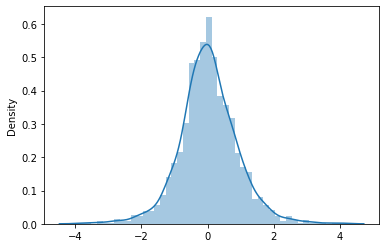

In [58]:
pred=pred.reshape(1518,1)
sns.distplot(y_test-pred)

We can observe that most of our predictions are very near to the actual result.

### Saving the model

In [59]:
import joblib
joblib.dump(mod,"TempPred.pkl")

['TempPred.pkl']